# Przewidywanie rezygnacji ze studiów 

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- Piotr Kula (*217302*)
- Kamil Marszałek (*217241*)

## Streszczenie

Za pomocą metod machine learning klasyfikujemy studentów do poszczególnej kategorii: porzucenie studiów lub sukcesywne ukończenie szkoły.  Do analizy wykorzystywane są czynniki ekonomiczne, demograficzne i socjologiczne. 

## Słowa kluczowe


...

## Wprowadzenie 

Rezygnowanie ze studiów to obecnie powszechne zjawisko, które niesie za sobą szereg różnych konsekwencji. W celu zniwelowania ryzyka porzucenia akademickiej nauki przez studenta warto przeanalizować jakie czynniki skłaniają do podjęcia takiej decyzji. Dzięki trafnemu przewidywaniu który uczeń porzuci studia akademickie instytucje mogą podjąć odpowiednie środki zapobiegawcze. 

### Przedmiot badania
Przedmiotem badania są studenci różnych kierunków wraz z informacjami na ich temat takimi jak ich pochodzenie, wiek, płeć i inne

### Cel i zakres badania

Celem badania jest przewidzenie, czy danych student zrezygnuje ze studiów czy nie. Użyjemu klasyfikacji za pomocą metody takiej i takiej

## Import odpowiednich bibliotek

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Przegląd danych

### Import danych

In [213]:
data = pd.read_csv("data.csv", sep = ';')
df = pd.DataFrame(data)

### Przegląd danych

In [214]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [215]:
print("Liczba wierszy:", data.shape[0])
print("Liczba kolumn:", data.shape[1])

Liczba wierszy: 4424
Liczba kolumn: 37


In [216]:
columns_data = pd.read_csv("data_description.csv")
columns_df = pd.DataFrame(columns_data)
pd.set_option('display.max_colwidth', None)
columns_df

,Column,Opis,Wartości
0,Marital status,Stan cywilny,1 – kawaler 2 – żonaty 3 – wdowiec 4 – rozwiedziony 5 – związek faktyczny 6 – formalnie rozdzielony
1,Application mode,Tryb aplikacji,"1 - pierwsza faza - kontyngent ogólny 2 - Rozporządzenie nr 612/93 5 - pierwsza faza - kontyngent specjalny (Wyspy Azorów) 7 - Posiadacze innych kursów wyższych 10 - Rozporządzenie nr 854-B/99 15 - Student międzynarodowy (licencjat) 16 - pierwsza faza - kontyngent specjalny (Wyspa Madera) 17 - druga faza - kontyngent ogólny 18 - trzecia faza - kontyngent ogólny 26 - Rozporządzenie nr 533-A/99, pkt b2) (Inny plan) 27 - Rozporządzenie nr 533-A/99, pkt b3 (Inna instytucja) 39 - Ponad 23 lata 42 - Przeniesienie 43 - Zmiana kursu 44 - Absolwenci specjalizacji technologicznej 51 - Zmiana instytucji/kursu 53 - Absolwenci dyplomu krótkiego cyklu 57 - Zmiana instytucji/kursu (Międzynarodowe)"
2,Application order,Kolejność aplikacji,Kolejność aplikacji (od 0 - pierwszy wybór; do 9 ostatni wybór)
3,Course,Kierunek studiów,33 - Technologie produkcji biopaliw 171 - Projektowanie i projektowanie multimediów 8014 - Usługi społeczne (uczestnictwo wieczorne) 9003 - Agronomia 9070 - Projektowanie komunikacji 9085 - Pielęgniarstwo weterynaryjne 9119 - Inżynieria informatyczna 9130 - Końszczyzna 9147 - Zarządzanie 9238 - Usługi społeczne 9254 - Turystyka 9500 - Pielęgniarstwo 9556 - Higiena jamy ustnej 9670 - Zarządzanie reklamą i marketingiem 9773 - Dziennikarstwo i komunikacja 9853 - Edukacja podstawowa 9991 - Zarządzanie (uczestnictwo wieczorne)
4,Daytime/evening attendance,Obecność (dzienna/wieczorowa),1 – dzienny 0 - wieczorny
5,Previous qualification,Poprzednie kwalifikacje,1 - Wykształcenie średnie 2 - Wyższe wykształcenie - licencjat 3 - Wyższe wykształcenie - stopień 4 - Wyższe wykształcenie - magister 5 - Wyższe wykształcenie - doktorat 6 - Częstotliwość wyższego wykształcenia 9 - 12 rok szkolny - nieukończony 10 - 11 rok szkolny - nieukończony 12 - Inny - 11 rok szkolny 14 - 10 rok szkolny 15 - 10 rok szkolny - nieukończony 19 - Podstawowe wykształcenie 3. cykl (9./10./11. rok) lub równorzędne 38 - Kurs specjalizacji technologicznej 40 - Wyższe wykształcenie - stopień (1. cykl) 42 - Profesjonalny kurs techniczny wyższej uczelni 43 - Wyższe wykształcenie - magister (2. cykl)
6,Previous qualification (grade),Poprzednia kwalifikacja (ocena),Ocena poprzedniej kwalifikacji (między 0 a 200)
7,Nationality,Narodowość,1 - Portugalski; 2 - Niemiecki; 6 - Hiszpański; 11 - Włoski; 13 - Holenderski; 14 - Angielski; 17 - Litewski; 21 - Angolski; 22 - Zielonoświątkowy; 24 - Gwinejski; 25 - Mozambicki; 26 - Santomean; 32 - Turecki; 41 - Brazylijski; 62 - Rumuński; 100 - Mołdawia (Republika); 101 - Meksykański; 103 - Ukraiński; 105 - Rosyjski; 108 - Kubański; 109 - Kolumbijski
8,Mother's qualification,Kwalifikacje matki,1 - Wykształcenie średnie - 12 rok szkolny lub równowartość 2 - Wyższe wykształcenie - licencjat 3 - Wyższe wykształcenie - stopień 4 - Wyższe wykształcenie - magister 5 - Wyższe wykształcenie - doktorat 6 - Częstotliwość wyższego wykształcenia 9 - 12 rok szkolny - nieukończony 10 - 11 rok szkolny - nieukończony 11 - 7 rok (Stary) 12 - Inny - 11 rok szkolny 14 - 10 rok szkolny 18 - Kurs ogólny handlu 19 - Podstawowe wykształcenie 3. cykl (9./10./11. rok) lub równorzędne 22 - Techniczny kurs zawodowy 26 - 7 rok szkolny 27 - 2 cykl ogólnego kursu średniego szkolnictwa 29 - 9 rok szkolny - nieukończony 30 - 8 rok szkolny 34 - Nieznany 35 - Nie umie czytać ani pisać 36 - Może czytać bez ukończenia 4 roku szkolnego 37 - Podstawowe wykształcenie 1. cykl (4./5. rok) lub równorzędne 38 - Podstawowe wykształcenie 2. cykl (6./7./8. rok) lub równorzędne 39 - Kurs specjalizacji technologicznej 40 - Wyższe wykształcenie - stopień (1. cykl) 41 - Kurs specjalistycznych studiów wyższych 42 - Profesjonalny kurs techniczny wyższej uczelni 43 - Wyższe wykształcenie - magister (2. cykl) 44 - Wyższe wykształcenie - doktorat (3. cykl)
9,Father's qualification,Kwalifikacje oj

## Przygotowanie danych do analizy

### Duplikaty


In [217]:
print(f"Liczba duplikatów w danych : {df.duplicated().sum()}")

Liczba duplikatów w danych : 0


### Braki danych

In [218]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### W zbiorze danych nie ma brakujących wartości

### Nasz zbiór danych spełnia warunki zbioru z kryteriów projektu, ponieważ zawiera conajmniej 10 cech i minimum 800 obserwacji. Nie zawiera również duplikatów, brakujący danych zatem nie ma potrzeby ich usuwania. 

## Wstępna analiza danych

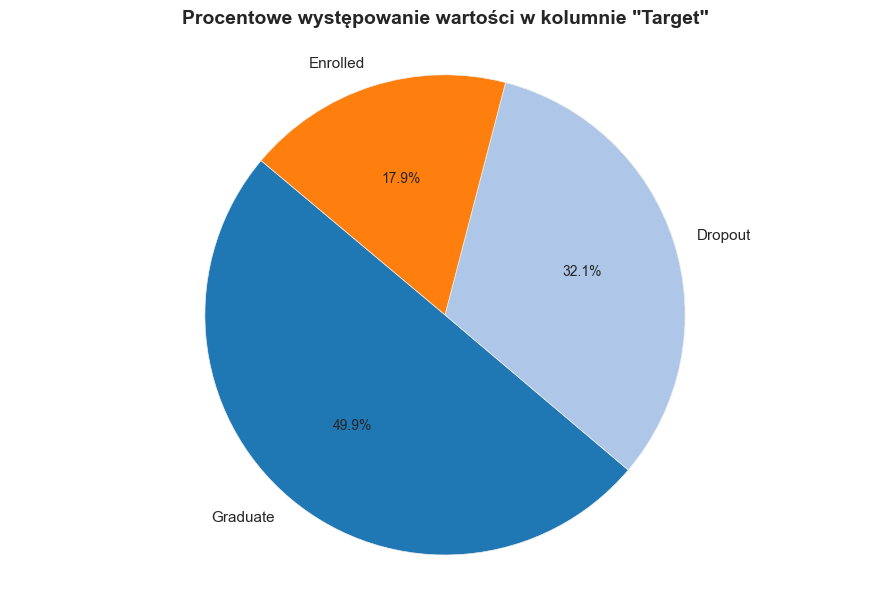

In [219]:
target_counts = df['Target'].value_counts(normalize=True) * 100

plt.figure(figsize=(9, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Procentowe występowanie wartości w kolumnie "Target"', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Jak można zauważyć na wykresie, niemalże połowa badanych studentów ukończyła z powodzeniem kurs. Około 20% badanych jest w trakcie trwania kursu a 30% nie udało się dokończyć rozpoczętego szkolenia.

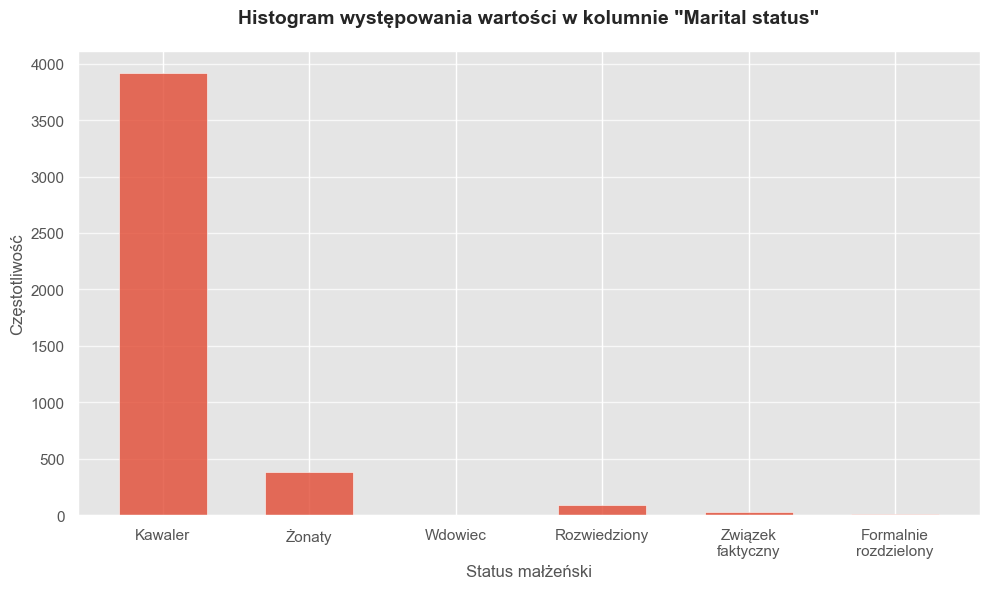

In [220]:
marital_status = df['Marital status']
labels = ['Kawaler', 'Żonaty', 'Wdowiec', 'Rozwiedziony', 'Związek faktyczny', 'Formalnie rozdzielony']
wrapped_labels = ['\n'.join(wrap(label, 12)) for label in labels]

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(marital_status, bins=range(1, 8), edgecolor='white', alpha=0.8, align='mid', rwidth=0.6)

plt.title('Histogram występowania wartości w kolumnie "Marital status"', fontsize=14, fontweight='bold', pad=20)  # Dodanie fontweight
plt.xlabel('Status małżeński', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)

plt.xticks(ticks=[i + 0.5 for i in range(1, 7)], labels=wrapped_labels, rotation=0, ha='center')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


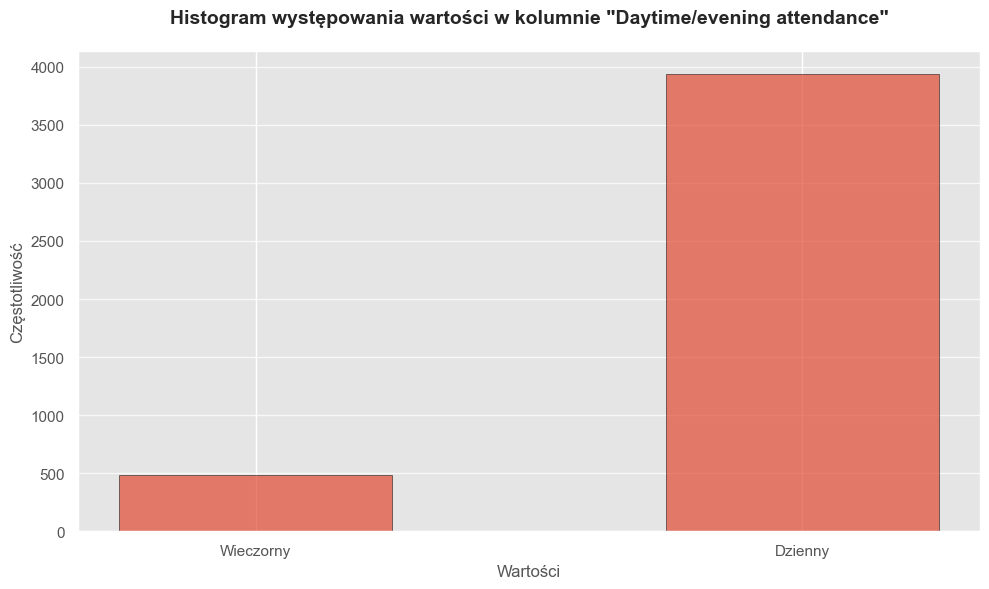

In [221]:
attendance = df['Daytime/evening attendance\t']

plt.figure(figsize=(10, 6))
plt.hist(attendance, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, align='mid', rwidth=0.5)  # zmniejszenie szerokości kolumn
plt.title('Histogram występowania wartości w kolumnie "Daytime/evening attendance"', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Wartości', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)

plt.xticks([0, 1], ['Wieczorny', 'Dzienny'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

plt.show()

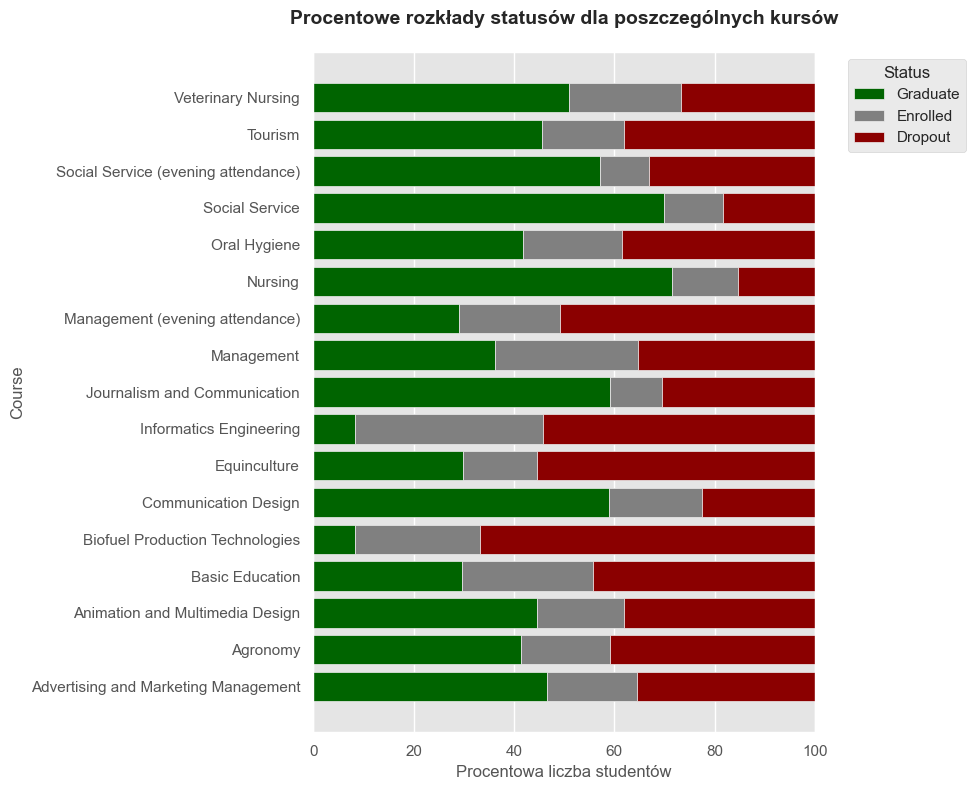

In [222]:
course_names = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df['Course'] = df['Course'].map(course_names)
grouped = df.groupby('Course')['Target'].value_counts(normalize=True).unstack(fill_value=0) * 100
fig, ax = plt.subplots(figsize=(10, 8))
colors = {'Graduate': 'darkgreen', 'Enrolled': 'grey', 'Dropout': 'darkred'}
bottom = pd.Series(data=[0]*len(grouped), index=grouped.index)

for status in ['Graduate', 'Enrolled', 'Dropout']:
    plt.barh(grouped.index, grouped[status], color=colors[status], label=status, left=bottom)
    bottom += grouped[status]

plt.title('Procentowe rozkłady statusów dla poszczególnych kursów', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Procentowa liczba studentów')
plt.ylabel('Course')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


## Boxploty, czyli analiza obserwacji odstających

### Bierzemy tylko zmienne ilościowe

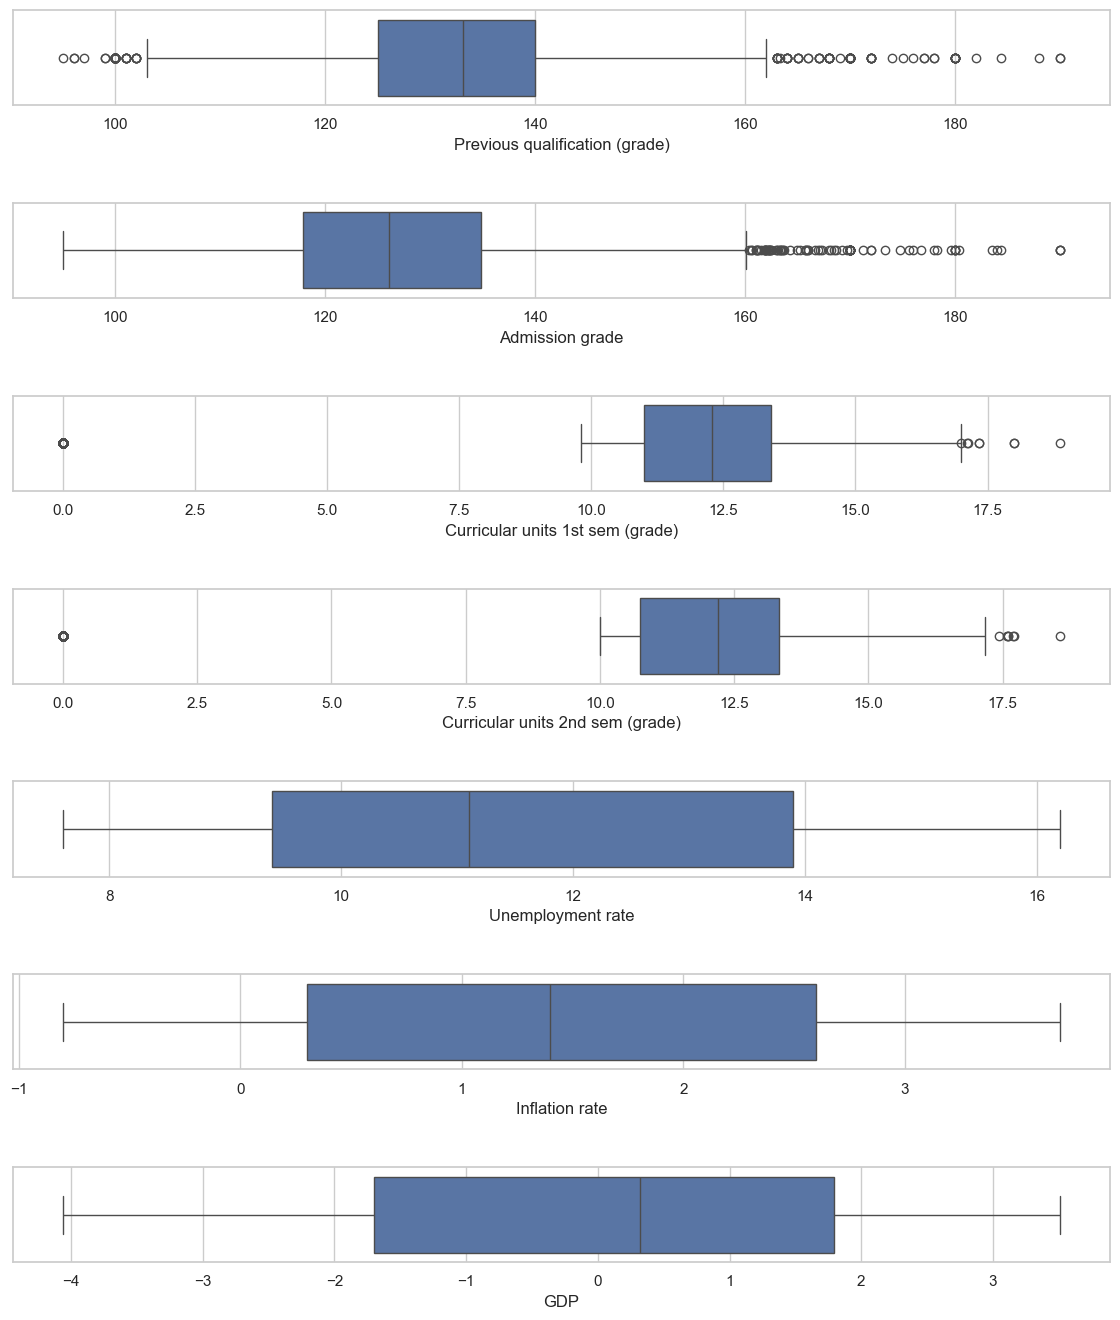

In [223]:
data_num = df.select_dtypes(include=['float64'])
data_num.columns
sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 14))


for i, column in enumerate(data_num.columns):
    plt.subplot(len(data_num.columns), 1, i + 1)
    sns.boxplot(x=data_num[column])
   # plt.title(f'Boxplot for {column}')
    plt.tight_layout(pad=3.0)


plt.show()

### W przypadku takich zmiennych jak admission grade i previous qualification widzimy dużą liczbę zmiennych odstających. Jest to realistyczny wynik m.in. dlatego, że uniwersytety przyjmują na studia kandydatów z różnymi ocenami (czasami liczy się kolejność zgłoszeń albo wymagania na dany kierunek są niższe). W przypadku pozostałych zmiennych ilość odstających obserwacji jest znikoma.  

In [224]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Zamiana wartości w kolumnie 'Target' na wartości liczbowe
df['Target'] = le.fit_transform(df['Target'])


### Odrzucenie wartości odstających:

In [225]:
data_num = df.select_dtypes(include=['float64']).columns.tolist()

df_cleaned = df.copy()

for i in data_num:
    Q1 = df_cleaned[i].quantile(0.25)
    Q3 = df_cleaned[i].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df_cleaned[i] >= Q1 - 3 * IQR) & (df_cleaned[i] <= Q3 + 3 * IQR)
    df_cleaned = df_cleaned[condition]

df_cleaned;


## Sprawdzanie korelacji pomiędzy zmiennymi

### Dzielimy zbiór danych na zbiory zmiennych ilościowych i objaśniających

In [226]:
# zmienne ilościowe
data_num = df_cleaned.select_dtypes(include=['float64']).copy()

additional_columns = [
    'Age at enrollment', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (without evaluations)'
]

# Dodaj te kolumny do data_num
data_num = pd.concat([data_num, df_cleaned[additional_columns]], axis=1)
data_num = data_num.astype(float)

# .columns.tolist()

# zmienne kategoryczne
data_categ = (df_cleaned.select_dtypes(include=['int64']))
data_categ = data_categ.drop(columns=additional_columns, errors='ignore')

### Teraz dzielę zmienne kategoryczne na te z porządkiem i te bez porządku

In [227]:
data_categ_with_order = [
    'Marital status',
    'Application order',
    'Previous qualification'
]

# Label encoding zmiennych kategorycznych z porządkiem
label_encoder = LabelEncoder()

for column in data_categ_with_order:
    df_cleaned[column + '_encoded'] = label_encoder.fit_transform(df_cleaned[column])


data_categ_without_order = [
    'Age at enrollment', 
    'Application mode', 
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Educational special needs',
    'Displaced',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

# One-Hot Encoding zmiennych kategorycznych bez porządku

df_cleaned = pd.get_dummies(df_cleaned, columns=data_categ_without_order)
df_cleaned.drop(data_categ_with_order, axis=1, inplace=True)

unused = ['Course', 'Daytime/evening attendance\t', 'Marital status_encoded', 'Application order_encoded', 'Previous qualification_encoded']
df_cleaned = df_cleaned.drop(unused, axis=1);

### Sprawdzamy korelację zmiennych między sobą, oraz zmienną wynikową **Target**

In [228]:
cor = df_cleaned.corr()

In [229]:
correlation_with_target = cor['Target'].drop('Target').abs().sort_values(ascending=False)
correlation_with_target.head(17)

Curricular units 2nd sem (approved)       0.437845
Tuition fees up to date_1                 0.383351
Tuition fees up to date_0                 0.383351
Curricular units 2nd sem (grade)          0.336603
Curricular units 1st sem (approved)       0.316445
Curricular units 1st sem (grade)          0.306604
Scholarship holder_0                      0.250738
Scholarship holder_1                      0.250738
Debtor_0                                  0.248087
Debtor_1                                  0.248087
Curricular units 2nd sem (evaluations)    0.237912
Curricular units 1st sem (evaluations)    0.207912
Gender_0                                  0.187542
Gender_1                                  0.187542
Application mode_1                        0.170474
Application mode_39                       0.142609
Age at enrollment_18                      0.124842
Name: Target, dtype: float64

### Wybieramy zmienne, które mają korelacje z celem >0.1

## Następnie wyrzucamy wysoko skorelowane zmienne między sobą (correlation >0.85)

Liczba zmiennych z korelacją względem 'Target' >0.1:                                    19
Liczba zmiennych z korelacją względem 'Target' >0.1 oraz nieskorelowanych między sobą:  17


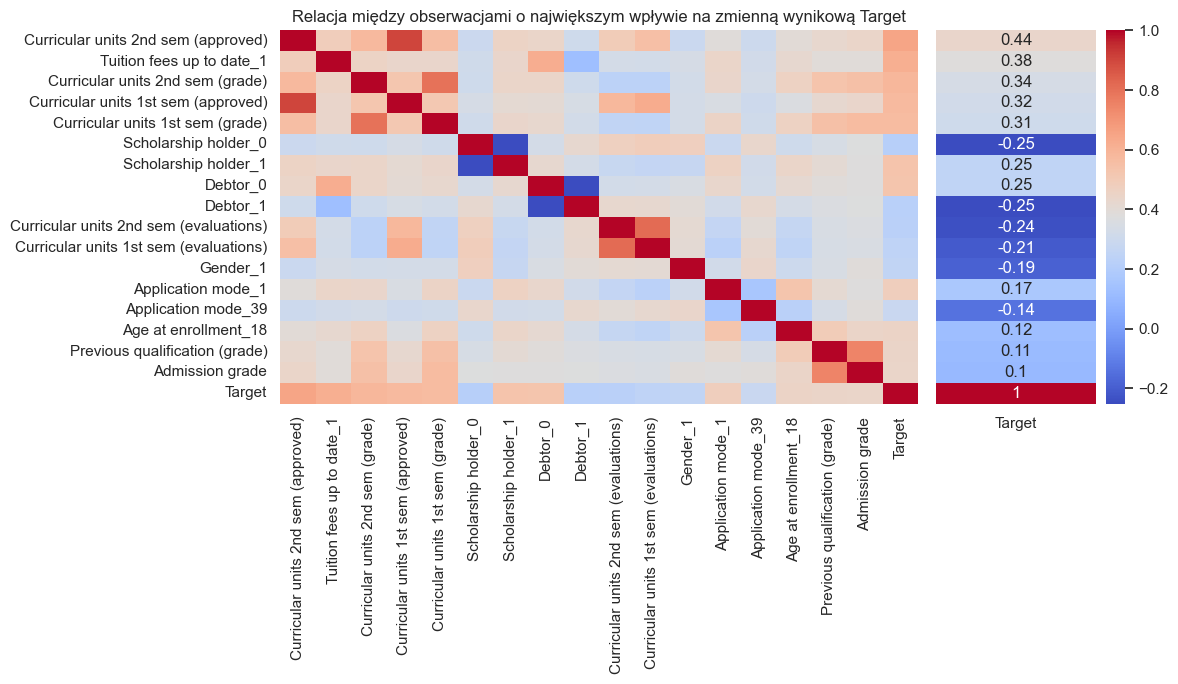

In [230]:
selected_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()

df_cleaned[selected_features]; # zmienne z korelacją względem zmiennej Target >0.1
print("Liczba zmiennych z korelacją względem 'Target' >0.1:                                   ", len(selected_features))

strong_correlated_pairs = cor[selected_features].abs().unstack().sort_values(ascending=False).drop_duplicates()

variables_to_remove = set()
for (var1, var2), corr_value in strong_correlated_pairs.items():
    if corr_value > 0.85 and var1 != var2:
        if var1 not in variables_to_remove:
            variables_to_remove.add(var2)

# Usuń wybrane zmienne
final_selected_features = [var for var in selected_features if var not in variables_to_remove]
print("Liczba zmiennych z korelacją względem 'Target' >0.1 oraz nieskorelowanych między sobą: ", len(final_selected_features))


plt.figure(figsize=(12, 7))
cos = final_selected_features.copy()
cos.append('Target')
cor2 = df_cleaned[cos].corr()
plt.subplot(1, 8, (1,6))
sns.heatmap(cor2, cmap=plt.cm.coolwarm, cbar=False)
plt.title('Relacja między obserwacjami o największym wpływie na zmienną wynikową Target')

plt.subplot(1, 8, (7,8))
sns.heatmap(cor2[['Target']], annot=True, cmap=plt.cm.coolwarm, yticklabels=False)
# plt.title('Relacja między obserwacjami o największym wpływie na zmienną wynikową Target')

plt.tight_layout()
plt.show()


### *Tutaj trzeba to podsumowac*

# *Do poniższych metod należy wykorzystać jedynie kolumny po korelacji*

## Balansowanie danych do modelowania

Aby wykorzystać nasze dane do tworzenia modelu należy je najpierw zbalanować wg kolumny Target, tzn. powinna być taka sama ilość obserwacji dająca ten sam wynik. 

In [231]:
target_counts = df_cleaned['Target'].value_counts()
target_counts

Target
2    2131
1     709
0     669
Name: count, dtype: int64

## Metoda Drzewa Klasyfikacyjnego - *do poprawy, oprócz danych z korelacji trzeba dodać optymalizację oraz zbalansować grupy do klasyfikacji, tzn. każda z grup (train and test) musi mieć równą liczbę obserwacji z targetem 1, 2, 3  **polecenie: *SMOTE****

### <potrzebny opis i wzór>

In [239]:
#usuniecie kolumny target z datasetu
X = df_cleaned.drop('Target', axis = 1)
y = df_cleaned['Target']

#podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Zbalansowanie zbioru treningowego za pomocą SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Target
2    1702
0    1702
1    1702
Name: count, dtype: int64

In [233]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Trenowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42)

# Optymalizacja hiperparametrów metodą Grid Search 
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)
print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_

# clf.fit(X_train_smote, y_train_smote);

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.50      0.47      0.49       123
           1       0.38      0.45      0.41       150
           2       0.80      0.76      0.78       429

    accuracy                           0.64       702
   macro avg       0.56      0.56      0.56       702
weighted avg       0.66      0.64      0.65       702



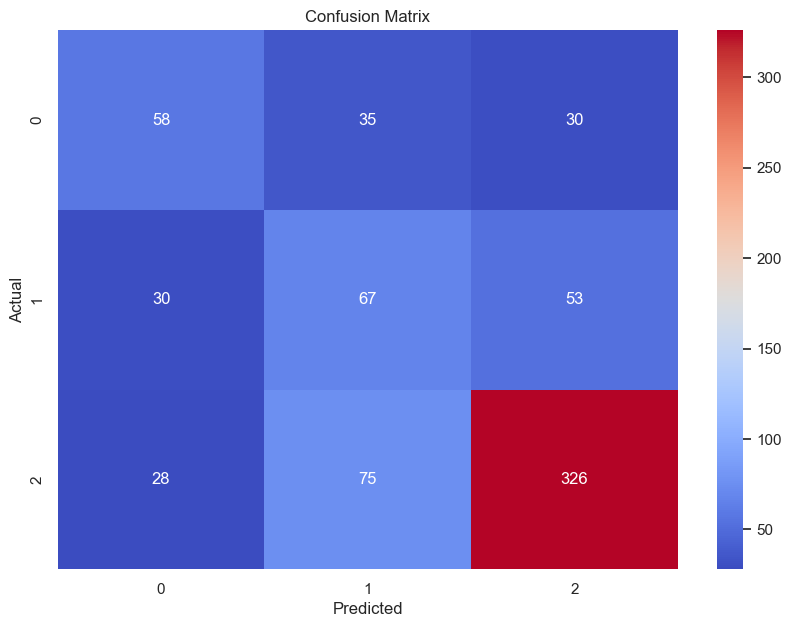

In [241]:
# Przewidywanie na zbiorze testowym
y_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)  # Lista unikalnych klas

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

print(classification_report(y_test, y_pred))

## Wybrane modele do klasyfikacji

wybrać z:

Na podstawie zbioru uczącego wyznaczamy klasyfikator
- LDA,
- QDA, 
- Fihera, 
- **Naive Bayes**, 
- **metoda najbliższego sąsiada**, 
- **SVM**,
- **drzewa klasyfikacyjne**, 
- **lasy losowe**, 
- **sieci neuronowe**, 
- wzmacnianie
- klasyfikatorów Boosting

Ocena skuteczności działania klasyfikatora 
- ocena wartości błędu klasyfikacji lub trafności klasyfikacji: 
  - metody kroswalidacji, 
  - krzywa ROC, 
  - AUC, 
  - macierz pomyłek (confusion matrix), 
  - mierniki klasyfikacji:
    - czułość, 
    - specyficzność, 
    - precyzja, 
    - F1-score